In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('/content/drive/MyDrive/Telco_Customer_Churn_Dataset  (1).csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [70]:
# Task 1: Data Preparation
# Drop customerID as it's not useful
df.drop(columns=['customerID'], inplace=True)

In [71]:
# Convert TotalCharges to numeric, setting errors='coerce' to handle any bad data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [72]:
# Handle missing values by filling them with median
df.fillna(df.median(numeric_only=True), inplace=True)


In [73]:
# Encode categorical variables
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [74]:
# Task 2: Split Data into Training and Testing Sets
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [83]:
print(f"Training set size: {X_train.shape[0]} ({(X_train.shape[0] / df.shape[0]) * 100:.2f}%)")
print(f"Testing set size: {X_test.shape[0]} ({(X_test.shape[0] / df.shape[0]) * 100:.2f}%)")


Training set size: 5634 (79.99%)
Testing set size: 1409 (20.01%)


In [75]:
# Task 3: Feature Selection
# Selecting important features based on domain knowledge
selected_features = ['Contract', 'MonthlyCharges', 'tenure']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [76]:
# Standardize features
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)


In [77]:
# Task 4: Model Selection
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
}




In [78]:
#Task 5: Model Training & Evaluation
# Evaluate each model
best_model = None
best_score = 0
results = {}

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    }

    if f1 > best_score:
        best_score = f1
        best_model = model

In [79]:
# Print evaluation results
for model, scores in results.items():
    print(f"{model}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")
    print()


Logistic Regression:
  Accuracy: 0.7771
  Precision: 0.5980
  Recall: 0.4893
  F1 Score: 0.5382
  ROC-AUC: 0.6852

Decision Tree:
  Accuracy: 0.7246
  Precision: 0.4810
  Recall: 0.4733
  F1 Score: 0.4771
  ROC-AUC: 0.6444

Random Forest:
  Accuracy: 0.7544
  Precision: 0.5452
  Recall: 0.4519
  F1 Score: 0.4942
  ROC-AUC: 0.6578

Gradient Boosting:
  Accuracy: 0.7850
  Precision: 0.6254
  Recall: 0.4733
  F1 Score: 0.5388
  ROC-AUC: 0.6854



In [80]:
# Task 6: Model Evaluation & Final Interpretation
y_pred_best = best_model.predict(X_test_selected)
final_accuracy = accuracy_score(y_test, y_pred_best)
final_report = classification_report(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Final Accuracy: {final_accuracy:.4f}")
print("Final Classification Report:\n", final_report)


Best Model: GradientBoostingClassifier
Final Accuracy: 0.7850
Final Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



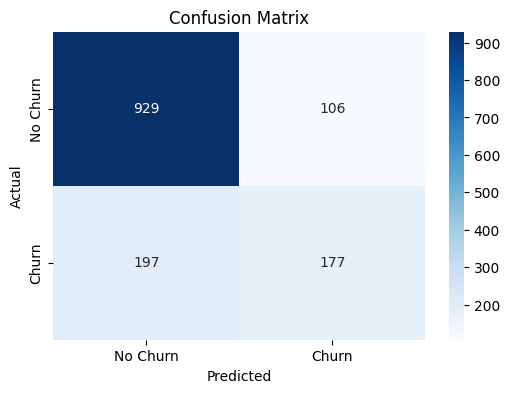

In [81]:
# Visualization of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [82]:
# Interpretation of evaluation results
print("\nInterpretation of Model Performance:")
print("Accuracy: Measures the overall correctness of predictions. A high value indicates a well-performing model but may not be sufficient in imbalanced datasets.")
print("Precision: Measures how many predicted positive cases are actually positive. Useful when false positives are costly.")
print("Recall: Measures how many actual positive cases were correctly predicted. Important in scenarios where missing positive cases is critical.")
print("F1 Score: A balance between precision and recall. A higher value indicates a more reliable model.")
print("ROC-AUC: Measures the model's ability to distinguish between classes. A value closer to 1 indicates strong discriminatory power.")

print(f"The best model selected based on F1 score is: {best_model.__class__.__name__}, which provides a good balance between precision and recall.")



Interpretation of Model Performance:
Accuracy: Measures the overall correctness of predictions. A high value indicates a well-performing model but may not be sufficient in imbalanced datasets.
Precision: Measures how many predicted positive cases are actually positive. Useful when false positives are costly.
Recall: Measures how many actual positive cases were correctly predicted. Important in scenarios where missing positive cases is critical.
F1 Score: A balance between precision and recall. A higher value indicates a more reliable model.
ROC-AUC: Measures the model's ability to distinguish between classes. A value closer to 1 indicates strong discriminatory power.
The best model selected based on F1 score is: GradientBoostingClassifier, which provides a good balance between precision and recall.
